In [1]:
from sklearn import ensemble
from sklearn import inspection
from sklearn import datasets
import matplotlib.pyplot as plt

In [10]:
import pandas as pd

def load_training_data(path: str) -> pd.DataFrame:

    train = pd.read_csv(path)
    train['kfold'] = -1

    return train

train = load_training_data("/inputs/categorical_challenge/train_folds.csv")

FileNotFoundError: [Errno 2] File b'/inputs/categorical_challenge/train_folds.csv' does not exist: b'/inputs/categorical_challenge/train_folds.csv'

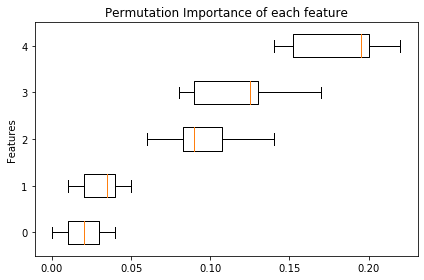

In [6]:
X, y = datasets.make_classification(random_state=0, n_features=5, n_informative=3)
rf = ensemble.RandomForestClassifier(random_state=0).fit(X, y)
result = inspection.permutation_importance(rf, X, y, n_repeats=10, random_state=0,
                                n_jobs=-1)

fig, ax = plt.subplots()
sorted_idx = result.importances_mean.argsort()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=range(X.shape[1]))
ax.set_title("Permutation Importance of each feature")
ax.set_ylabel("Features")
fig.tight_layout()
plt.show()